#IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#IMPORTING DATASET

In [2]:
data=pd.read_csv('fetal_health.csv')
x=data.drop(['fetal_health'], axis=1)  # axis=1 indicates that we are dropping one column
y=data['fetal_health']

#ANLYZING THE DATASET

In [3]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
nan_count = data.isna().sum()

In [5]:
nan_count

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#Visualising Dataset

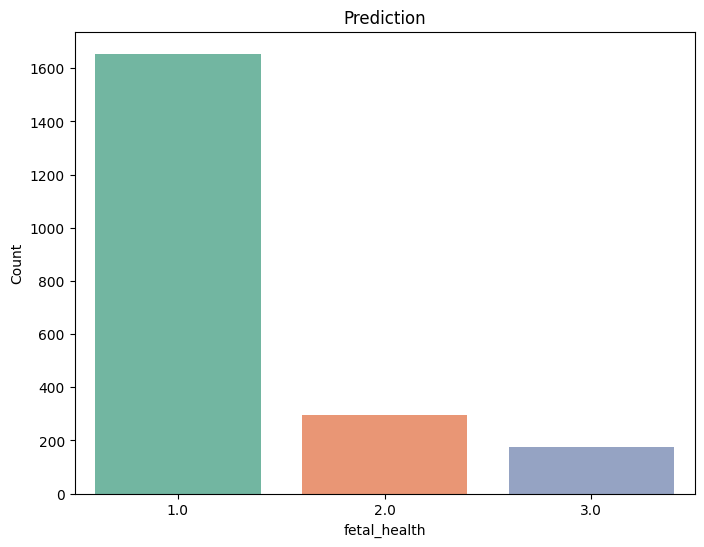

Class Distribution:
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


In [6]:
# Count the occurrences of each class in the target variable
class_counts = data['fetal_health'].value_counts()

# Plot a bar graph to visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='fetal_health', data=data, palette='Set2')
plt.title('Prediction')
plt.xlabel('fetal_health')
plt.ylabel('Count')
plt.show()

# Print the class counts
print("Class Distribution:")
print(class_counts)

#SPLITTING DATASET INTO TRAINING AND TESTING SET

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

#Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#Training model using Decision Tree Classifier



In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)


In [10]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model: {classifier}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("="*75)

Model: DecisionTreeClassifier(criterion='entropy', random_state=42)
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       333
         2.0       0.78      0.78      0.78        64
         3.0       0.90      0.90      0.90        29

    accuracy                           0.92       426
   macro avg       0.88      0.88      0.88       426
weighted avg       0.92      0.92      0.92       426



#Training model using Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [12]:
y_pred=classifier.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model: {classifier}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("="*75)

Model: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       333
         2.0       0.88      0.72      0.79        64
         3.0       0.88      0.97      0.92        29

    accuracy                           0.94       426
   macro avg       0.90      0.89      0.89       426
weighted avg       0.94      0.94      0.93       426



#Training model using KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred=classifier.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model: {classifier}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("="*75)

Model: KNeighborsClassifier()
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       333
         2.0       0.81      0.69      0.75        64
         3.0       0.79      0.76      0.77        29

    accuracy                           0.92       426
   macro avg       0.85      0.81      0.82       426
weighted avg       0.91      0.92      0.91       426



#Training model using Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [18]:
y_pred=classifier.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model: {classifier}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("="*75)

Model: LogisticRegression(random_state=0)
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       333
         2.0       0.63      0.64      0.64        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.88       426
   macro avg       0.77      0.78      0.77       426
weighted avg       0.88      0.88      0.88       426



#Training model using Linear SVM

In [20]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [21]:
y_pred=classifier.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model: {classifier}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("="*75)

Model: SVC(kernel='linear', random_state=0)
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       333
         2.0       0.66      0.64      0.65        64
         3.0       0.76      0.76      0.76        29

    accuracy                           0.88       426
   macro avg       0.79      0.78      0.78       426
weighted avg       0.88      0.88      0.88       426



#Training model using Kernel SVM

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [24]:
y_pred=classifier.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model: {classifier}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("="*75)

Model: SVC(random_state=0)
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       333
         2.0       0.70      0.72      0.71        64
         3.0       0.92      0.76      0.83        29

    accuracy                           0.90       426
   macro avg       0.85      0.81      0.83       426
weighted avg       0.90      0.90      0.90       426



#Training model using Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [27]:
y_pred=classifier.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model: {classifier}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("="*75)

Model: GaussianNB()
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      0.65      0.79       333
         2.0       0.35      0.94      0.51        64
         3.0       0.43      0.55      0.48        29

    accuracy                           0.69       426
   macro avg       0.59      0.71      0.60       426
weighted avg       0.86      0.69      0.73       426



#Training model using Gradient Boosting Classifier

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=100, max_features=5)
classifier.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=100)

In [30]:
y_pred=classifier.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model: {classifier}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("="*75)

Model: GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=100)
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       333
         2.0       0.90      0.84      0.87        64
         3.0       0.93      0.97      0.95        29

    accuracy                           0.96       426
   macro avg       0.93      0.93      0.93       426
weighted avg       0.96      0.96      0.96       426

